## Import necessary modules

In [40]:
import numpy as np
import pandas as pd
import glob   


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Read dataset

In [2]:
df = pd.concat(
    map(pd.read_csv, glob.glob("ds\\*.csv")), ignore_index=True)
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1
...,...,...,...,...,...
1950,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
1951,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1952,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1953,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [3]:
# keep only relevant columns
df.drop(["COMMENT_ID","AUTHOR","DATE"], axis = 1 , inplace = True)

In [4]:
# no missing values
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [5]:
# check if data is balanced. Naive bayes requires dataset to be balanced. 
df['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

## Split data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df['CONTENT'], df['CLASS'], test_size = .20,
                                                   random_state = 4, stratify = df['CLASS'] )

In [7]:
y_train.value_counts(normalize = True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [8]:
y_test.value_counts(normalize = True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

In [9]:
x_train

108     8 million likes xD even the subscribers not 8 ...
661     #nowplaying "Weekendmix" track 04 : Katy Perry...
964     Check out this playlist on YouTube:🍴🍴🏄🏄🏄🍴🏄🏄🏄🏄🏊...
273     You know a song sucks dick when you need to us...
1788    Hello everyone my name&#39;s Anderson and i&#3...
                              ...                        
61      Behold the most viewed youtube video in the hi...
263     If you pause at 1:39 at the last millisecond y...
1576    hey guys look im aware im spamming and it piss...
822     okay, this should cover me for some time... Th...
1811                     This makes me miss the world cup
Name: CONTENT, Length: 1564, dtype: object

In [10]:
y_train

108     0
661     1
964     1
273     0
1788    1
       ..
61      0
263     0
1576    1
822     1
1811    0
Name: CLASS, Length: 1564, dtype: int64

## Count vectorization

In [12]:
vectorizer = CountVectorizer()
# fit and transform with training text
x_train_trans = vectorizer.fit_transform(x_train)

# based on the training data corpus, get word count of test text
x_test_trans = vectorizer.transform(x_test)

In [13]:
x_train_trans.toarray().shape

(1564, 3911)

In [14]:
x_test_trans.toarray().shape

(391, 3911)

# Training and Prediction

Here we try out two different algorithms namely the Multinomial and the the Complement Naive Bayes. Both of the algorithms are widely used for text classification tasks and the complement naive bayes is assumed to perform better with imbalanced datasets. Although this dataset isnt significantly imbalanced, we will still examine whether there is any difference in the performance between the two models
<br>
<br>


## Multinomial Naive bayes

In [29]:
MNB_clf = MultinomialNB()

# train model with count vector and labels
MNB_clf.fit(x_train_trans, y_train)


MultinomialNB()

In [30]:
# Show parameters for this estimator.
# Class prior probabilities are learnt, if we want to use a uniform 
# class prior then set fit_prior to false
MNB_clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [32]:
MNB_pred = MNB_clf.predict(x_test_trans)
print(MNB_pred)

[0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1
 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1]


In [36]:
MNB_clf.classes_

array([0, 1], dtype=int64)

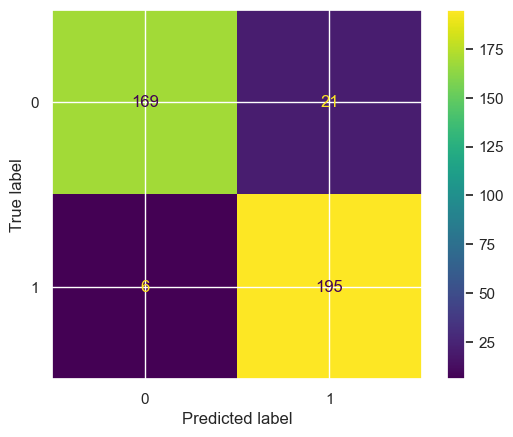

In [45]:
 ConfusionMatrixDisplay.from_predictions(y_test, MNB_pred, labels = MNB_clf.classes_)

In [48]:
print(classification_report(y_test, MNB_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.89      0.93       190
        Spam       0.90      0.97      0.94       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



## Complement Naive Bayes

In [35]:
CNB_clf = ComplementNB()

CNB_clf.fit(x_train_trans, y_train)
CNB_pred = CNB_clf.predict(x_test_trans)
print(CNB_pred)

[0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1]


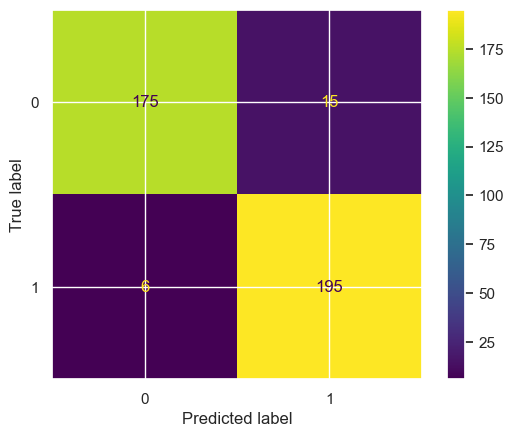

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, CNB_pred, labels = CNB_clf.classes_)

## Comparing models

In [49]:
# Complement model
print(classification_report(y_test, CNB_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.92      0.94       190
        Spam       0.93      0.97      0.95       201

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



In [50]:
# Multinominal model
print(classification_report(y_test, MNB_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.89      0.93       190
        Spam       0.90      0.97      0.94       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



### Based on the above findings, we can say that the complement model shows better metrics. But we can improve the multinominal model's performance by tweaking the prior params

In [67]:
MNB_clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [68]:
MNB_clf_2 = MultinomialNB(class_prior = np.array([0.65, 0.35]))

In [69]:
MNB_clf_2.get_params()

{'alpha': 1.0, 'class_prior': array([0.65, 0.35]), 'fit_prior': True}

In [70]:
MNB_clf_2.fit(x_train_trans, y_train)
MNB_2_pred = MNB_clf_2.predict(x_test_trans)
print(MNB_2_pred)

[0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1]


In [71]:
print(classification_report(y_test, MNB_2_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.96      0.95      0.95       190
        Spam       0.95      0.96      0.96       201

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



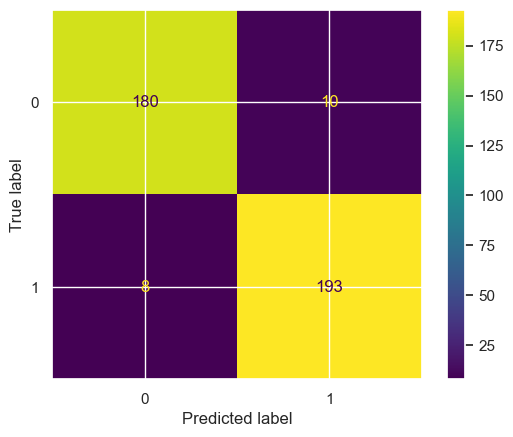

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, MNB_2_pred, labels = MNB_clf_2.classes_)

For this use-case which is to determine which comments are relevant and which are just spam, we would want a model with higher recall as we don't want a real comment to get removed just because it was falsely classified as spam.

## Make prediction on new text:

In [89]:
predict_data = vectorizer.transform(['what a nice winner', "did this man win 10m dollars?",
                                     'You can win 1m dollars right now, just click on this link!!!'])

In [90]:
MNB_clf_2.predict(predict_data)

array([0, 1, 1], dtype=int64)